In [25]:
import configparser
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
params = {}
config = configparser.ConfigParser()
config.read("../experiments/20190625_hand_mv2_cpm.cfg")
for _ in config.options("Train"):
    params[_] = eval(config.get("Train", _))

In [27]:
import dataset

In [28]:
params

{'model': 'mv2_cpm',
 'checkpoint': '/home/ubuntu/sandbox/trained/20190625_02/mv2_cpm_tiny_hand/models/mv2_cpm_batch-16_lr-0.0001_gpus-1_192x192_experiments-mv2_cpm',
 'datapath': '/home/ubuntu/sandbox/hand_labels',
 'imgpath': '/home/ubuntu/sandbox/hand_labels',
 'visible_devices': '0',
 'multiprocessing_num': 16,
 'max_epoch': 2000,
 'lr': '0.0001',
 'batchsize': 16,
 'decay_rate': 0.5,
 'input_width': 192,
 'input_height': 192,
 'n_kpoints': 21,
 'scale': 2,
 'identify_occlusion': False,
 'modelpath': '/home/ubuntu/sandbox/trained/20190625_02/mv2_cpm_tiny_hand/models',
 'logpath': '/home/ubuntu/sandbox/trained/20190625_02/mv2_cpm_tiny_hand/log',
 'num_train_samples': 400,
 'per_update_tensorboard_step': 10,
 'per_saved_model_step': 200,
 'pred_image_on_tensorboard': True}

In [29]:
from dataset import get_train_dataset_pipeline, get_valid_dataset_pipeline

In [30]:
dataset.set_config(params)

In [31]:
input_pipeline = get_train_dataset_pipeline(batch_size=16, epoch=10, buffer_size=100)

preparing annotation from: /home/ubuntu/sandbox/hand_labels/left_hand_train.json
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [32]:
iter = input_pipeline.make_one_shot_iterator()

In [33]:
import tensorflow as tf
sess = tf.InteractiveSession()

/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [34]:
x = sess.run(iter.get_next())

In [35]:
x, y = x

In [36]:
x.shape

(16, 256, 256, 3)

In [37]:
y.shape

(16, 256, 256, 21)

In [38]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [39]:
import numpy as np

In [40]:
y[0,:,:,4].shape

(256, 256)

In [41]:
np.sum(y[0,:,:,5] == y[0,:,:,1])

65173

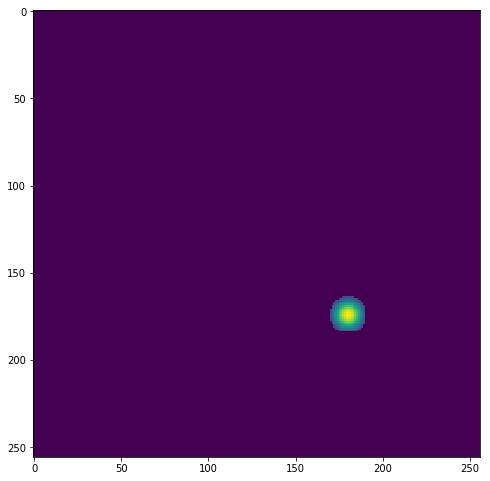

In [45]:
plt.imshow(y[0,:,:,7])

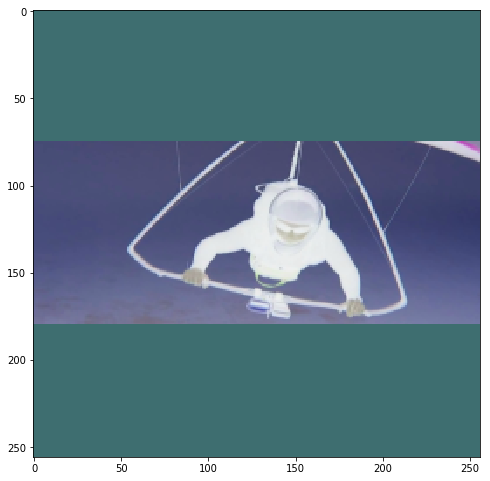

In [43]:
plt.imshow(x[0,:,:,:])

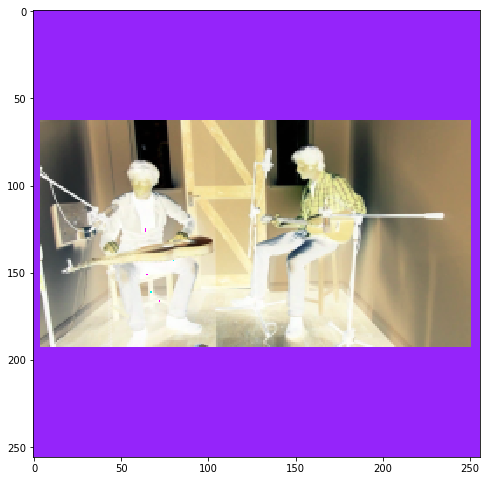

In [38]:
plt.imshow(x[0,:,:,:])

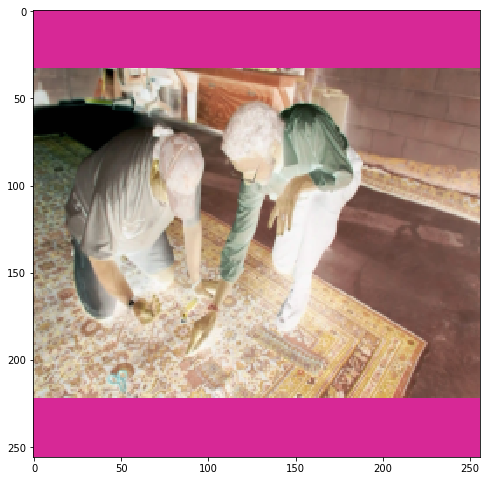

In [53]:
plt.imshow(x[3])

In [28]:
iter.get_next()

(<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 192, 192, 3) dtype=float32>,
 <tf.Tensor 'IteratorGetNext_1:1' shape=(?, 96, 96, 21) dtype=float32>)

In [10]:
from pycocotools.coco import COCO
coco = COCO("/home/ubuntu/sandbox/hand_labels/left_hand_train.json")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [11]:
from pycocotools.coco import COCO
coco = COCO("/home/ubuntu/sandbox/ai_challenger/ai_challenger_train.json")

loading annotations into memory...
Done (t=0.43s)
creating index...
index created!


In [12]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
human



In [14]:
import numpy as np
catIds = coco.getCatIds(catNms=['left_hand']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds);
imgIds = coco.getImgIds(imgIds = [0])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

[1]


In [15]:
img

{'license': 1,
 'file_name': 'manual_train/000015774_01_l.jpg',
 'height': 720,
 'width': 1280,
 'id': 0}

In [16]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

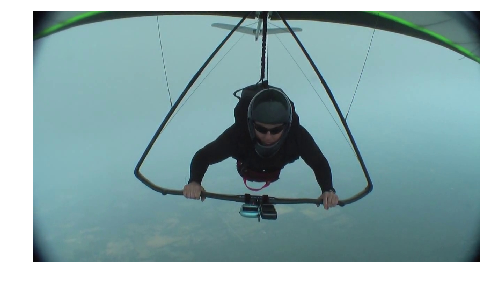

In [18]:
I = io.imread("/home/ubuntu/sandbox/hand_labels/" + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [20]:
annIds

[0]

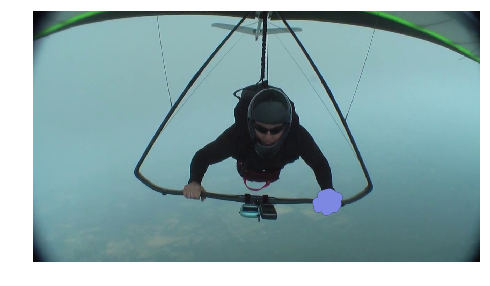

In [22]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [21]:
anns[0]["keypoints"]

[847,
 522,
 2,
 837,
 525,
 2,
 828,
 528,
 2,
 813,
 548,
 2,
 817,
 562,
 2,
 838,
 524,
 2,
 836,
 552,
 2,
 837,
 560,
 2,
 840,
 570,
 2,
 853,
 526,
 2,
 848,
 551,
 2,
 846,
 561,
 2,
 844,
 569,
 2,
 862,
 530,
 2,
 860,
 549,
 2,
 857,
 556,
 2,
 853,
 563,
 2,
 870,
 534,
 2,
 869,
 552,
 2,
 865,
 557,
 2,
 862,
 561,
 2]

In [39]:
anns

[{'num_keypoints': 13,
  'area': 256220,
  'keypoints': [305,
   203,
   2,
   304,
   292,
   2,
   344,
   314,
   2,
   243,
   295,
   2,
   337,
   416,
   2,
   218,
   395,
   2,
   328,
   490,
   2,
   280,
   448,
   2,
   299,
   435,
   2,
   253,
   427,
   1,
   370,
   529,
   2,
   201,
   530,
   2,
   381,
   614,
   2,
   142,
   622,
   2],
  'bbox': [21, 141, 460, 557],
  'image_id': 3,
  'category_id': 1,
  'id': 0}]

In [84]:
transform

[(1, 1),
 (2, 2),
 (4, 4),
 (6, 6),
 (8, 8),
 (3, 3),
 (5, 5),
 (7, 7),
 (10, 10),
 (12, 12),
 (14, 14),
 (9, 9),
 (11, 11),
 (13, 13)]

In [ ]:
"keypoints": ["top_head", "neck", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

IndexError: index 13 is out of bounds for axis 0 with size 13

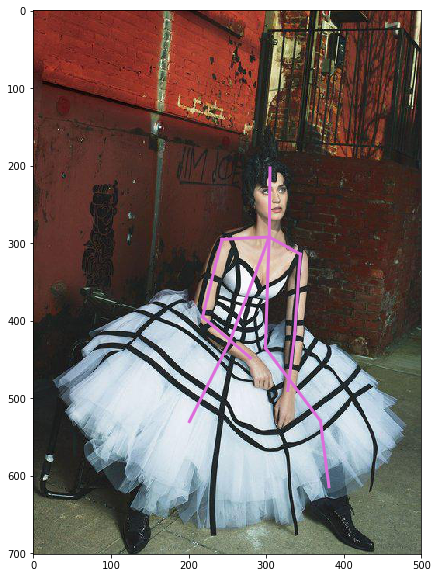

In [45]:
anns = [{'num_keypoints': 13
    ,
  'area': 256220,
  'keypoints': [305,
   203,
   2,
   304,
   292,
   2,
   344,
   314,
   2,
   243,
   295,
   2,
   337,
   416,
   2,
   218,
   395,
   2,
   328,
   490,
   2,
   280,
   448,
   2,
   299,
   435,
   2,
   253,
   427,
   1,
   370,
   529,
   2,
   201,
   530,
   2,
   381,
   614,
   2,
   142,
   622,
   2],
  'bbox': [21, 141, 460, 557],
  'image_id': 3,
  'category_id': 1,
  'id': 0}]
plt.imshow(I); plt.axis('on')
coco.showAnns(anns)

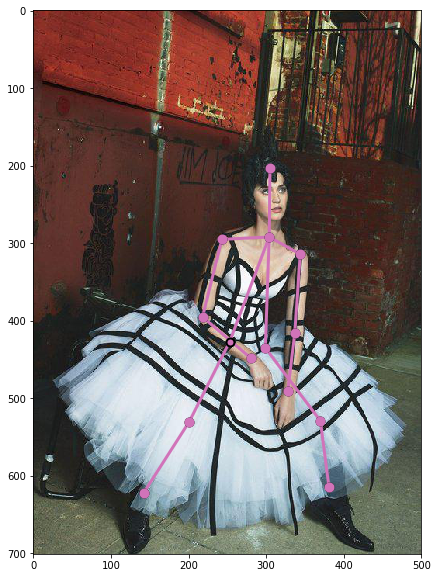

In [38]:
plt.imshow(I); plt.axis('on')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
transform = list(zip(
            [1, 2, 4, 6, 8, 3, 5, 7, 10, 12, 14, 9, 11, 13],
            [1, 2, 4, 6, 8, 3, 5, 7, 10, 12, 14, 9, 11, 13]
        ))
"keypoints": ["top_head", "neck", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

In [ ]:
coco.info()


# In[5]:

# get IDs of all images in the annotation file
im_id_list = coco.getImageIds()
print 'The validation split contains %d images'%(len(im_id_list))
print 'the first 3 image IDs are'
print im_id_list[0:3]


# In[6]:

# get IDs of images that have people
im_id_list = coco.getImageIds({'cat_id':1})
print '%d images have people'%(len(im_id_list))


# In[7]:

# read annotations in first 3 images
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1]})
print 'This image contains %d instances'%(len(anns))
# visualize the annotations
coco.showAnns(anns)


# In[17]:

# get IDs of all images in the annotation file
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1], 'cat_id': 1})
print '%d of them are people'%(len(anns))
# visualize the annotations that are people
print 'visualize image %d:'%(im_id_list[0])
coco.showAnns(anns)
# visualize the annotations that are people and area is less than 100*100
print 'get instances that are smaller than 100*100'
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1], 'cat_id': 1, 'area__lt':100*100})
coco.showAnns(anns)
# visualize the annotations that are people and area is greater than 100*100
print 'get instances that are greater than 100*100'
anns = coco.loadAnnotations(params={'im_id_list': im_id_list[0:1], 'cat_id': 1, 'area__gt':100*100})
coco.showAnns(anns)


# In[9]:

# load sentences annotations and print out data
annotation_file = 'annotations/sentences_val2014.json'
image_folder = './images'


# In[10]:

# initializing coco sentence object to read, search, and visualize COCO dataset
coco_sentences= COCO(annotation_file=annotation_file, image_folder=image_folder)


# In[11]:

# get IDs of all sentences in the annotation file
anns = coco_sentences.loadAnnotations()
print 'The validation split has %d sentence annotations'%(len(anns))


# In[12]:

# get IDs of all sentences by images
anns = coco_sentences.loadAnnotations({'im_id_list': [458755]})
#print 'show sentences'
coco_sentences.showAnns(anns)


In [48]:
"""Prepare MS COCO datasets"""
import os
import shutil
import argparse
import zipfile
from gluoncv.utils import download, makedirs
from gluoncv.data.mscoco.utils import try_import_pycocotools

_TARGET_DIR = os.path.expanduser('~/sandbox/datasets/coco')

def parse_args():
    parser = argparse.ArgumentParser(
        description='Initialize MS COCO dataset.',
        epilog='Example: python mscoco.py --download-dir ~/mscoco',
        formatter_class=argparse.ArgumentDefaultsHelpFormatter)
    parser.add_argument('--download-dir', type=str, default='~/mscoco/', help='dataset directory on disk')
    parser.add_argument('--no-download', action='store_true', help='disable automatic download if set')
    parser.add_argument('--overwrite', action='store_true', help='overwrite downloaded files if set, in case they are corrupted')
    args = parser.parse_args()
    return args

def download_coco(path, overwrite=False):
    _DOWNLOAD_URLS = [
        ('http://images.cocodataset.org/zips/train2017.zip',
         '10ad623668ab00c62c096f0ed636d6aff41faca5'),
        ('http://images.cocodataset.org/annotations/annotations_trainval2017.zip',
         '8551ee4bb5860311e79dace7e79cb91e432e78b3'),
        ('http://images.cocodataset.org/zips/val2017.zip',
         '4950dc9d00dbe1c933ee0170f5797584351d2a41'),
        # ('http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip',
         # '46cdcf715b6b4f67e980b529534e79c2edffe084'),
        # test2017.zip, for those who want to attend the competition.
        # ('http://images.cocodataset.org/zips/test2017.zip',
        #  '4e443f8a2eca6b1dac8a6c57641b67dd40621a49'),
    ]
    makedirs(path)
    for url, checksum in _DOWNLOAD_URLS:
        filename = download(url, path=path, overwrite=overwrite, sha1_hash=checksum)
        # extract
        with zipfile.ZipFile(filename) as zf:
            zf.extractall(path=path)

if __name__ == '__main__':
    args = parse_args()
    path = os.path.expanduser(args.download_dir)
    if not os.path.isdir(path) or not os.path.isdir(os.path.join(path, 'train2017')) \
        or not os.path.isdir(os.path.join(path, 'val2017')) \
        or not os.path.isdir(os.path.join(path, 'annotations')):
        if args.no_download:
            raise ValueError(('{} is not a valid directory, make sure it is present.'
                              ' Or you should not disable "--no-download" to grab it'.format(path)))
        else:
            download_coco(path, overwrite=args.overwrite)

    # make symlink
    makedirs(os.path.expanduser('~/sandbox/datasets/coco'))
    if os.path.isdir(_TARGET_DIR):
        os.remove(_TARGET_DIR)
    os.symlink(path, _TARGET_DIR)
    try_import_pycocotools()

[autoreload of numpy failed: Traceback (most recent call last):
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 378, in superreload
    module = reload(module)
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/numpy/__init__.py", line 151, in <module>
    from .testing import Tester, _

usage: __main__.py [-h] [--download-dir DOWNLOAD_DIR] [--no-download]
                   [--overwrite]
__main__.py: error: unrecognized arguments: -f /run/user/1000/jupyter/kernel-7e8e7edd-c724-4349-907d-f27dc7b5cabd.json


SystemExit: 2

/home/ubuntu/anaconda3/envs/pose/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
